<a href="https://colab.research.google.com/github/PaulMorte/test/blob/master/3_dim_array_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT

In [2]:
from keras import backend as K
import os
from importlib import reload
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import sklearn
import matplotlib.pyplot as plt
import math
from keras.layers import Input, Flatten, Reshape

#from sklearn.cross_validation import  train_test_split
from sklearn.preprocessing import MinMaxScaler
#from sklearn.metrics import mean_squared_error
#np.random.seed(7)


!pip install tensorflowjs 
import tensorflowjs as tfjs


import tensorflow as tf
tf.compat.v1.disable_eager_execution()
# код фиксит проблему с версиями тензор флоу

ERROR: jupyter-console 6.0.0 has requirement prompt-toolkit<2.1.0,>=2.0.0, but you'll have prompt-toolkit 1.0.16 which is incompatible.
ERROR: google-colab 1.0.0 has requirement six~=1.12.0, but you'll have six 1.11.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: six 1.12.0
    Uninstalling six-1.12.0:
      Successfully uninstalled six-1.12.0


#DATA

In [3]:
labels = ["СТРОИМ «ПО УМУ» КАРКАСНЫЕ ДОМА ДЛЯ ПОСТОЯННОГО ПРОЖИВАНИЯ","Блок конструкции круглые кнопки","Вы точно знаете куда вложен каждый рубль","Блок Проекты","Скачайте полный каталог проектов","Наши преимущества","Как будет выглядеть ваш дом?","Обязательно посетите нашу выставочную площадку в нижнем новгороде","Комплект внутренних коммуникации включает в себя все для комфортной жизни","СТРОИТЕЛЬСТВО без головной боли","У вас уже есть проект дома ИЛИ готовая смета?","Каркасный дом - это тишина и спокойствие на свежем воздухе","Крепкая и теплая конструкция","Европейская эстетика внутри","Комфорт с природой, вдали от шума города","Большая выставочная площадка Подробнее","Полноценная работа под ключ","каркасный домПроект «Семейный» Площадь: 128 m2 Комнат: 4 Санузлов: 2 1 038 500 руб.","каркасный домПроект «Семейный NEW» Площадь: 165 m2 Комнат: 2 Санузлов: 2 1 354 400 руб.","каркасный домПроект «Малахит» Площадь: 100 m2 Комнат: 1 Санузлов: 1 819 000 руб.","каркасный домПроект «Ландыш» Площадь: 86 m2 Комнат: 3 Санузлов: 2 734 000 руб.","каркасный домПроект «Князь» Площадь: 140 m2 Комнат: 3 Санузлов: 1 1 259 000 руб.","каркасный домПроект «Мечта» Площадь: 240 m2 Комнат: 4 Санузлов: 2 1 806 000 руб.","Чистый договор с поэтапным расчетом ","Жесткий контроль качества стройматериалов","8 (831) 420-6197","Главная","Выставочная площадка","Этапы строительства","Карта застройки","Контакты","Политика конфиденциальности","Главная","Выставочная площадка","Карта застройки","Этапы работы","Контакты","8 (831) 213 63 46","выставочную площадку","Смотреть карту застройки","Крепкая и теплая конструкция","Европейская эстетика внутри","Большая выставочная площадка Подробнее","каркасный домПроект «Семейный» Площадь: 128 m2 Комнат: 4 Санузлов: 2 1 038 500 руб.","каркасный домПроект «Семейный NEW» Площадь: 165 m2 Комнат: 2 Санузлов: 2 1 354 400 руб.","каркасный домПроект «Малахит» Площадь: 100 m2 Комнат: 1 Санузлов: 1 819 000 руб.","каркасный домПроект «Ландыш» Площадь: 86 m2 Комнат: 3 Санузлов: 2 734 000 руб.","каркасный домПроект «Князь» Площадь: 140 m2 Комнат: 3 Санузлов: 1 1 259 000 руб.","каркасный домПроект «Мечта» Площадь: 240 m2 Комнат: 4 Санузлов: 2 1 806 000 руб.","Подробнее о выставочной площадке","Рассчитать стоимость проекта","ОСТАВИТЬ ЗАЯВКУ","Заказать звонок","Получить смету дома","Скачать каталог","Скачать каталог","Подробнее о выставочной площадке","Рассчитать стоимость проекта","Приложить файл","ОТПРАВИТЬ","ЗАКРЫТИЕ МОДАЛЬНОГО ОКНА modalbg","ЗАКРЫТИЕ МОДАЛЬНОГО ОКНА close_modal"]
data_raw = [[[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]],[[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0]],[[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]],[[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]],[[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]],[[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0]],[[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]]]


data_len = len(data_raw[0][0]);
data_step_count = 5;
data_zero =[0 for i in range(data_len)] 



data_step = data_step_count - 1;
def getTrain(arr):    
  tx=[]
  ty=[]  
  for fa in arr:    
    print('========================================================')
    for i in range(len(fa)-1):
      a = []      
      for xaz in range(data_step-i):  a.append(  data_zero  )
      dt = (i-data_step) if i>=data_step else 0        
      a = a + fa[dt:i+1]
      #print(a, '---',fa[i+1])  
      tx.append(a)     
      ty.append(fa[i+1])         
  return [tx,ty]
    
  
xtrain,ytrain = getTrain(data_raw)
xtrain = np.array(xtrain)
ytrain = np.array(ytrain)


print('========================================================')
#print('x',xtrain[0])
#print('y',ytrain[0])



print('========================================================')
print(len(data_raw) ,' LENGTH ARR')
#for el in data_raw:     print( el,labels[np.argmax(el)] )
dataset = np.array(data_raw)   
print('DATASET SHAPE',dataset.shape )
print('XTRAIN SHAPE',xtrain.shape )
print('YTRAIN SHAPE',ytrain.shape )


7  LENGTH ARR
DATASET SHAPE (7,)
XTRAIN SHAPE (46, 5, 62)
YTRAIN SHAPE (46, 62)


In [4]:
#PREPARING

for i in range(len(xtrain)):   print( i,  'xtrain[i]',' ',       labels[np.argmax(     ytrain[i]     )]       )
print('---------------------------------------------------------------------------------------------------')
print( xtrain.shape)
print('---------------------------------------------------------------------------------------------------')
xtrain = np.reshape(xtrain, (-1, data_step_count, xtrain.shape[2])) # 13 - количество элементов в двухмерном массиве [ n ]    n = [0,1,0]
print(xtrain.shape)

0 xtrain[i]   Блок конструкции круглые кнопки
1 xtrain[i]   Большая выставочная площадка Подробнее
2 xtrain[i]   Блок конструкции круглые кнопки
3 xtrain[i]   Блок Проекты
4 xtrain[i]   Скачайте полный каталог проектов
5 xtrain[i]   Обязательно посетите нашу выставочную площадку в нижнем новгороде
6 xtrain[i]   Подробнее о выставочной площадке
7 xtrain[i]   Блок конструкции круглые кнопки
8 xtrain[i]   Европейская эстетика внутри
9 xtrain[i]   Большая выставочная площадка Подробнее
10 xtrain[i]   Большая выставочная площадка Подробнее
11 xtrain[i]   Блок конструкции круглые кнопки
12 xtrain[i]   Большая выставочная площадка Подробнее
13 xtrain[i]   Полноценная работа под ключ
14 xtrain[i]   Блок Проекты
15 xtrain[i]   каркасный домПроект «Семейный» Площадь: 128 m2 Комнат: 4 Санузлов: 2 1 038 500 руб.
16 xtrain[i]   каркасный домПроект «Малахит» Площадь: 100 m2 Комнат: 1 Санузлов: 1 819 000 руб.
17 xtrain[i]   каркасный домПроект «Князь» Площадь: 140 m2 Комнат: 3 Санузлов: 1 1 259 000 р

#TRAINING MODEL

In [20]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 30, return_sequences = False, input_shape = (xtrain.shape[1], xtrain.shape[2])))
regressor.add(Dropout(0.2))





#regressor.add(Flatten())


# Adding the output layer

regressor.add(Dense(xtrain.shape[2], activation='softmax'))
  
  
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.summary()

# Fitting the RNN to the Training set
regressor.fit(xtrain, ytrain, epochs = 5300, batch_size = 30,verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 30)                11160     
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 62)                1922      
Total params: 13,082
Trainable params: 13,082
Non-trainable params: 0
_________________________________________________________________


#TESTING PREPARING

Предсказанные
----------------------------------------------------
Верные ответы


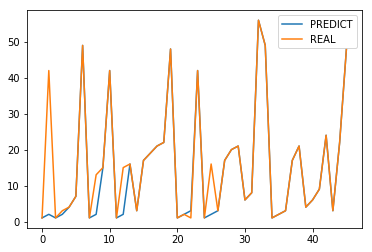

In [21]:
def get_max_args(arr_input,count=1):
  a = []
  arr = arr_input.copy()
  for i in range(count):
    get_index = np.argmax(arr)
    a_compelx = []
    a_compelx.append(  labels[np.argmax( arr  )]   )
    a_compelx.append(arr[get_index]*100  )   
    a_compelx.append(get_index  )   
    a.append(a_compelx    )    
    arr[get_index] = 0
  return a


print('Предсказанные')

plot_predict = regressor.predict(    xtrain  )
aplot = []
for i in range(len(xtrain)):
  af  = get_max_args(plot_predict[i])
  #print(af)
  aplot.append(af[0][2])
               

print('----------------------------------------------------')

print('Верные ответы')

realplot = []
for i in range(len(ytrain)):
  af  = get_max_args(ytrain[i])
  #print(af)
  realplot.append(af[0][2])
    
    
    


plt.plot(aplot,label='PREDICT')
plt.plot(realplot,label='REAL')

#plt.plot(predict[0],label=labels[np.argmax( predict  )])

plt.legend()
plt.show()




# ТЕСТ НА ПРИМЕРЕ

In [22]:
def normalize_input_predict(arr):
  a =  arr.copy() 
  if len(a)>data_step_count:
    a = a[len(a)-data_step_count:len(a)]
  while len(a)<data_step_count:
    a.insert(0,data_zero)
  a = np.array(a)
  a = np.reshape(a, (-1, data_step_count, xtrain.shape[2])) 
  return a
    
  
x_input_raw = [[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
x_input = normalize_input_predict(x_input_raw)
print(x_input.shape)
print(x_input)


(1, 5, 62)
[[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]]


-------------------
[[2.25307048e-07 9.94439960e-01 1.01522230e-04 4.62103076e-03
  2.76947336e-04 2.03660193e-07 1.26698546e-06 4.74489243e-05
  9.17499347e-06 8.40174039e-07 3.05519421e-07 2.30122723e-07
  3.35767993e-07 4.71298990e-05 1.51263421e-07 1.12100635e-04
  1.69764011e-04 5.09770962e-06 2.78978263e-07 1.04150821e-08
  6.96766620e-07 2.64577557e-05 2.47201478e-06 2.53230610e-07
  6.33320587e-06 1.94520808e-07 2.09095361e-07 2.39277455e-07
  2.68419001e-07 3.44469186e-07 2.19677432e-07 2.47251364e-07
  2.28209558e-07 2.38846553e-07 2.66229051e-07 1.81343765e-07
  3.24481135e-07 2.29781065e-07 2.13879460e-07 2.60290165e-07
  1.70538755e-07 2.78290855e-07 9.51204274e-05 2.59948820e-07
  1.85772080e-07 2.65709104e-07 3.40794173e-07 2.64508429e-07
  8.14320356e-06 1.81330797e-05 2.12207752e-07 2.02993718e-07
  3.16468572e-07 2.52705689e-07 2.13113893e-07 2.11906411e-07
  8.96850736e-08 2.26523028e-07 1.54152403e-07 3.40666759e-07
  3.65239572e-07 2.08882696e-07]]
[0.99443996, 0.0

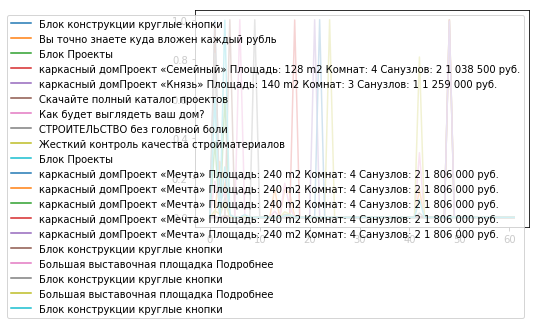

In [23]:
def boola(a):
  arr = [0 for i in range(data_len)]
  index = np.argmax(a)
  arr[index] = 1
  return arr


def get_max_args(arr_input,count=1):
  a = []
  arr = arr_input[0].copy()
  for i in range(count):
    get_index = np.argmax(arr)
    a.append(arr[get_index]  )
    arr[get_index] = 0
  return a


predict = regressor.predict(    x_input  ,verbose=0  )


print('-------------------')
print(predict)
print(get_max_args(predict, 3) )
print(ytrain[0] , labels[np.argmax(  predict  )]     )
print('-------------------')











print('START``````````````````````````````````````````````````````````````')
tested_prog = x_input.copy() 


prev_arr = x_input.copy() ;


for i in range(20):  
  if i == 0:
    val =  np.reshape(tested_prog[i], (-1, data_step_count, xtrain.shape[2]));
  
  if i > 0:
    val =  np.reshape( np.array(prev_arr) , (-1, data_step_count, xtrain.shape[2]));
  
  predict = regressor.predict( val   )
    
  print( get_max_args(predict) , labels[np.argmax( predict  )]     )
  plt.plot(predict[0],label=labels[np.argmax( predict  )])
    
  
  prev_arr = np.delete(prev_arr[0],0,axis = 0)
  #print(prev_arr,len(prev_arr),prev_arr.shape)
  #print('---')
  prev_arr = np.append( prev_arr,   boola(predict)         );
  #print(boola(predict) )
  prev_arr =  np.reshape( prev_arr , (-1, data_step_count, xtrain.shape[2]));
  #print(prev_arr)
  
  print('``````````````````````````````````````````````````````````````')



#plt.plot(xtest,label='true')
plt.legend()
plt.show()



#SAVE MODEL

In [0]:




#model.save('my_model.h5')


tfjs.converters.save_keras_model(regressor,'./snn_lstm')


#OLD CODE

In [0]:
# creating split arrays
xtrain = []
xtest = []
max_el_learn = 2

for i in range(max_el_learn, len(dataset)):
    xtrain.append(dataset[i-max_el_learn:i, 0])
    xtest.append(dataset[i, 0])
    
xtrain, xtest = np.array(xtrain), np.array(xtest)





for i in range(len(xtrain)):
  print(   xtrain[i],' ',       labels[np.argmax(     xtest[i]     )]       )
  
print('---------------------------------------------------------------------------------------------------')
print(xtrain, xtrain.shape)

[[0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0]]   Просмотр фото 1
[[1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0]]   Просмотр фото 2
[[0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0]]   Просмотр фото 3
[[0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0]]   Просмотр фото 4
[[0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0]]   Просмотр фото 5
[[0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0]]   Просмотр фото 6
[[0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]]   КНОПКА получить все фото
[[0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0]]   Закрытие формы захвата modal_bg
[[0 0 0 1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0]]   КНОПКА Оставить заявку первый экран
[[1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0]]   Закрытие формы захвата modal_bg
[[0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0]]   ПРОЧЕЛ ТЕКСТ АКЦИЮ БЕСПЛАТНО
[[1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0]]   КНОПКА ПОЛУЧИТЬ БЕ

#RESHAPING TO TRAIN

In [0]:
#xtrain = np.reshape(xtrain, (-1, 2, 13)) # 13 - количество элементов в двухмерном массиве [ n ]    n = [0,1,0]
#print(xtrain,xtrain.shape)


# Увеличить с 2 до 5 последовательность обучения
# Пустые заполнить нулями
#


[[[0 1 0 0 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0 0 0 0]]

 [[1 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 1 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 1 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 1 0 0 0 0 0]]

 [[0 0 0 0 0 0 0 1 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 1 0 0 0 0]]

 [[0 0 0 0 0 0 0 0 1 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 1 0 0 0]]

 [[0 0 0 0 0 0 0 0 0 1 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 1 0 0]]

 [[0 0 0 0 0 0 0 0 0 0 1 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 1 0]]

 [[0 0 0 0 0 0 0 0 0 0 0 1 0]
  [0 0 0 1 0 0 0 0 0 0 0 0 0]]

 [[0 0 0 1 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0 0 0 0]]

 [[1 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 1 0 0 0 0 0 0 0 0 0 0]]

 [[0 0 1 0 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0 0 0 0]]

 [[1 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 1 0 0 0 0 0 0 0 0]]

 [[0 0 0 0 1 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 1]]

 [[0 0 0 0 0 0 0 0 0 0 0 0 1]
  [1 0 0 0 0 0 0 0 0 0 0 0 0]]

 [[1 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 1 0 0 0 0 0 0 0]]] (15, 2, 13)


#TRAIN

In [0]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10, return_sequences = False, input_shape = (xtrain.shape[1], 13)))
regressor.add(Dropout(0.2))

#regressor.add(Flatten())


# Adding the output layer

regressor.add(Dense(13, activation='softmax'))
  
  
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.summary()

# Fitting the RNN to the Training set
regressor.fit(xtrain, xtest, epochs = 1150, batch_size = 32,verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 10)                960       
_________________________________________________________________
dropout_6 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 13)                143       
Total params: 1,103
Trainable params: 1,103
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1150
15/15 [==============================] - 1s 86ms/step - loss: 0.0712
Epoch 2/1150
15/15 [==============================] - 0s 238us/step - loss: 0.0712
Epoch 3/1150
15/15 [==============================] - 0s 403us/step - loss: 0.0713
Epoch 4/1150
15/15 [==============================] - 0s 389us/step - loss: 0.0711
Epoch 5/1150
15/15 [==============================] - 0s 207us/step - los

#Проверка данных


[['Просмотр фото 3', 9.088018536567688, 8]]
[['Просмотр фото 3', 9.703351557254791, 8]]
[['Просмотр фото 3', 9.979692846536636, 8]]
[['Просмотр фото 3', 9.568741917610168, 8]]
[['Просмотр фото 3', 9.67128872871399, 8]]
[['Просмотр фото 3', 9.088018536567688, 8]]
[['Просмотр фото 3', 9.703351557254791, 8]]
[['Просмотр фото 3', 9.979692846536636, 8]]
[['Просмотр фото 3', 9.568741917610168, 8]]
[['Просмотр фото 3', 9.67128872871399, 8]]
----------------------------------------------------
[['Просмотр фото 2', 100, 7]]
[['Просмотр фото 3', 100, 8]]
[['Просмотр фото 4', 100, 9]]
[['Просмотр фото 5', 100, 10]]
[['Просмотр фото 6', 100, 11]]
[['Просмотр фото 2', 100, 7]]
[['Просмотр фото 3', 100, 8]]
[['Просмотр фото 4', 100, 9]]
[['Просмотр фото 5', 100, 10]]
[['Просмотр фото 6', 100, 11]]


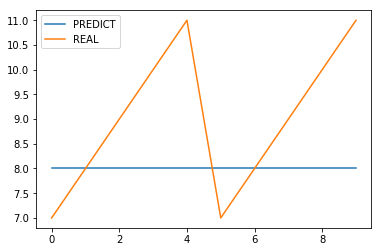

In [0]:
def get_max_args(arr_input,count=1):
  a = []
  arr = arr_input.copy()
  for i in range(count):
    get_index = np.argmax(arr)
    a_compelx = []
    a_compelx.append(  labels[np.argmax( arr  )]   )
    a_compelx.append(arr[get_index]*100  )   
    a_compelx.append(get_index  )   
    a.append(a_compelx    )    
    arr[get_index] = 0
  return a




plot_predict = regressor.predict(    xtrain  )
aplot = []
for i in range(len(xtrain)):
  af  = get_max_args(plot_predict[i])
  print(af)
  aplot.append(af[0][2])
               

print('----------------------------------------------------')

realplot = []
for i in range(len(ytrain)):
  af  = get_max_args(ytrain[i])
  print(af)
  realplot.append(af[0][2])
    
    
    


plt.plot(aplot,label='PREDICT')
plt.plot(realplot,label='REAL')

#plt.plot(predict[0],label=labels[np.argmax( predict  )])

plt.legend()
plt.show()




#Тестирование на примере


-------------------
[[5.1864064e-03 3.8061495e-04 2.1854168e-04 1.0182604e-03 2.3468696e-03
  6.5137465e-05 6.7986030e-04 2.0708721e-02 9.4398493e-01 2.2277363e-02
  3.2706169e-04 2.2353989e-03 5.7084509e-04]]
[0.9439849, 0.022277363, 0.020708721]
[0 0 0 0 0 0 1 0 0 0 0 0 0] Просмотр фото 1
-------------------
************************
(1, 2, 13)
[[[0 0 0 0 0 0 0 1 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 1 0 0 0 0]]]
[[0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0]]
************************
``````````````````````````````````````````````````````````````
[0.9326204] Просмотр фото 4
``````````````````````````````````````````````````````````````
[0.9342344] Просмотр фото 5
``````````````````````````````````````````````````````````````
[0.9132688] Просмотр фото 6
``````````````````````````````````````````````````````````````
[0.95964456] КНОПКА получить все фото
``````````````````````````````````````````````````````````````
[0.96774465] Закрытие формы захвата modal_bg
````````````````````````

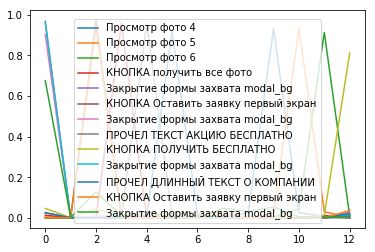

In [0]:

  
  
x_input = np.array(  [[0,0,0,0,0,0,1,0,0,0,0,0,0],[0,0,0,0,0,0,0,1,0,0,0,0,0]]   )
x_input = np.reshape(x_input, (-1, 2, 13)) # 13 - количество элементов в двухмерном массиве [ n ]    n = [0,1,0]
#print(x_input)



def get_max_args(arr_input,count=1):
  a = []
  arr = arr_input[0].copy()
  for i in range(count):
    get_index = np.argmax(arr)
    a.append(arr[get_index]  )
    arr[get_index] = 0
  return a


predict = regressor.predict(    x_input  ,verbose=0  )

print('-------------------')
print(predict)
print(get_max_args(predict, 3) )
print(xtest[0] , labels[np.argmax(  xtest[0]  )]     )

print('-------------------')




test_data_raw = [[0,0,0,0,0,0,0,1,0,0,0,0,0],[0,0,0,0,0,0,0,0,1,0,0,0,0]] 
tested_prog = np.array(test_data_raw)
tested_prog = np.reshape(tested_prog, (-1, 2, 13))



print('************************')
print(tested_prog.shape)
print(tested_prog)
print(  np.array(tested_prog[0])        )
print('************************')

print('``````````````````````````````````````````````````````````````')



def boola(a):
  arr = [0,0,0,0,0,0,0,0,0,0,0,0,0]
  index = np.argmax(a)
  arr[index] = 1
  return arr




prev_arr = test_data_raw.copy() ;


for i in range(13):  
  if i == 0:
    val =  np.reshape(tested_prog[i], (-1, 2, 13));
  
  if i > 0:
    val =  np.reshape( np.array(prev_arr), (-1, 2, 13));
  
  predict = regressor.predict( val   )
    
  print( get_max_args(predict) , labels[np.argmax( predict  )]     )
  plt.plot(predict[0],label=labels[np.argmax( predict  )])
  
   
  prev_arr.pop(0)
  prev_arr.append(    boola(predict)         );
  #print(boola(predict) )
  #print(prev_arr)
  
  print('``````````````````````````````````````````````````````````````')



#plt.plot(xtest,label='true')
plt.legend()
plt.show()




